<a href="https://colab.research.google.com/github/EzhilSaha/CE888/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
# from sklearn.metrics import fbeta_score, Scorer
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:

df_1=df
# Column "duration" must be deleted
# df_1.drop('duration',axis='columns',inplace=True)
df_1[["y"]] = df_1[["y"]].apply(LabelEncoder().fit_transform)
# Check if there are any missing values in the dataset. If there are, drop the rows.
print("Number of rows before dropping NaNs: %d" % len(df_1))
df_1 = df_1.dropna()
print("Number of rows after dropping NaNs: %d" % len(df_1))
# categorical columns
# OneHotEncoding
cat_cols = df_1.select_dtypes(include=['object']).columns
df_1 = pd.get_dummies(df_1, columns=cat_cols)

#standard Scaler for Numerical Variables
# scaler = StandardScaler()
# num_cols = df_1.select_dtypes(include=['float64', 'int64']).columns
# num_cols = num_cols.drop('y')
# df_1[num_cols] = scaler.fit_transform(df[num_cols])

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


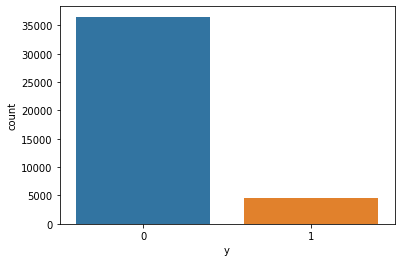

0    0.887346
1    0.112654
Name: y, dtype: float64


In [ ]:
sns.countplot(x='y',data=df_1)
plt.show()

print(df_1.y.value_counts(normalize=True))

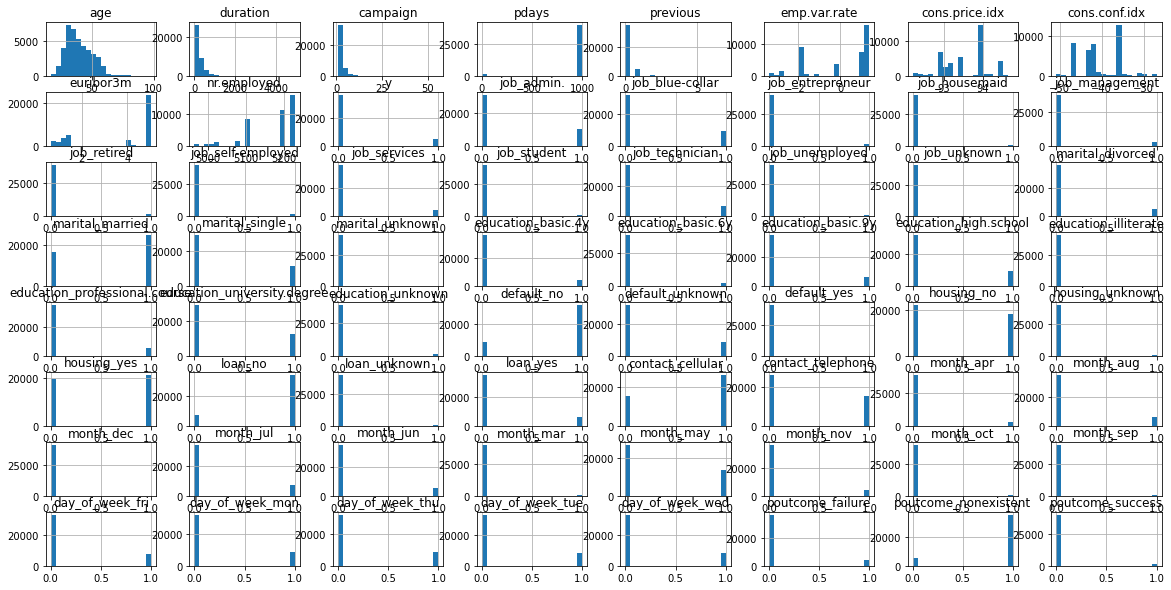

In [ ]:
df_1.hist(bins=20, figsize=(20,10));

In [ ]:

# df_dummies = pd.get_dummies(df_1)
# df_dummies

In [ ]:
print(df_1.columns)
features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
# df_1[["age","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]] = df_1[["age","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]].apply(LabelEncoder().fit_transform)

X_df = df_1[features].copy()
y_df = df_1["y"].copy()
X = X_df.values
y = y_df.values


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [ ]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)


In [ ]:
# clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)
# clf.fit(X_train, y_train)

# dummy_clf = DummyClassifier(strategy='stratified')
# dummy_clf.fit(X_train, y_train)

# dummy_scores = cross_val_score(dummy_clf, X, y, cv=10, scoring=make_scorer(f1_score))
# scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(f1_score))

# print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
# print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))

In [ ]:
#quiz work out 1

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# clf = RandomForestClassifier(n_estimators=150, max_depth=6, random_state=50)
# clf.fit(X_train, y_train)
# scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(f1_score))

# print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

# quiz work out 2


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)
# clf.fit(X_train, y_train)
# scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(f1_score))

# print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

# quiz workout 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

clf = RandomForestClassifier(n_estimators=400, max_depth=8, random_state=60)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(f1_score))

print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

ACC: 0.03 +/- 0.07


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 300],
    'max_features':['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 100}


In [ ]:
clf = RandomForestClassifier(n_estimators=100,max_features='auto', random_state=50)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))
print(scores.mean())

clf.fit(X_train, y_train)

0.37877973895924766


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

[ 0  7  1  8  2  5  6 36 61 38  4  9 31 28 22 23 55 58  3 57 18 56 54 39
 41 30 10 27 21 13 16 59 25 43 42 33 34 60 26 32 14 15 11 17 52 19 49 12
 50 44 48 53 37 45 40 47 20 51 46 24 29 35]
Feature ranking:
1. age (0.160258)
2. euribor3m (0.127230)
3. campaign (0.081008)
4. nr.employed (0.041200)
5. pdays (0.040525)
6. cons.price.idx (0.025397)
7. cons.conf.idx (0.023860)
8. housing_no (0.021235)
9. poutcome_success (0.021153)
10. housing_yes (0.020621)
11. emp.var.rate (0.020409)
12. job_admin. (0.018237)
13. education_university.degree (0.016697)
14. education_high.school (0.016659)
15. marital_married (0.016604)
16. marital_single (0.015293)
17. day_of_week_mon (0.014968)
18. day_of_week_wed (0.014602)
19. previous (0.014558)
20. day_of_week_tue (0.014050)
21. job_technician (0.014041)
22. day_of_week_thu (0.014034)
23. day_of_week_fri (0.013655)
24. loan_no (0.013624)
25. loan_yes (0.013387)
26. education_professional.course (0.012105)
27. job_blue-collar (0.011991)
28. education_b

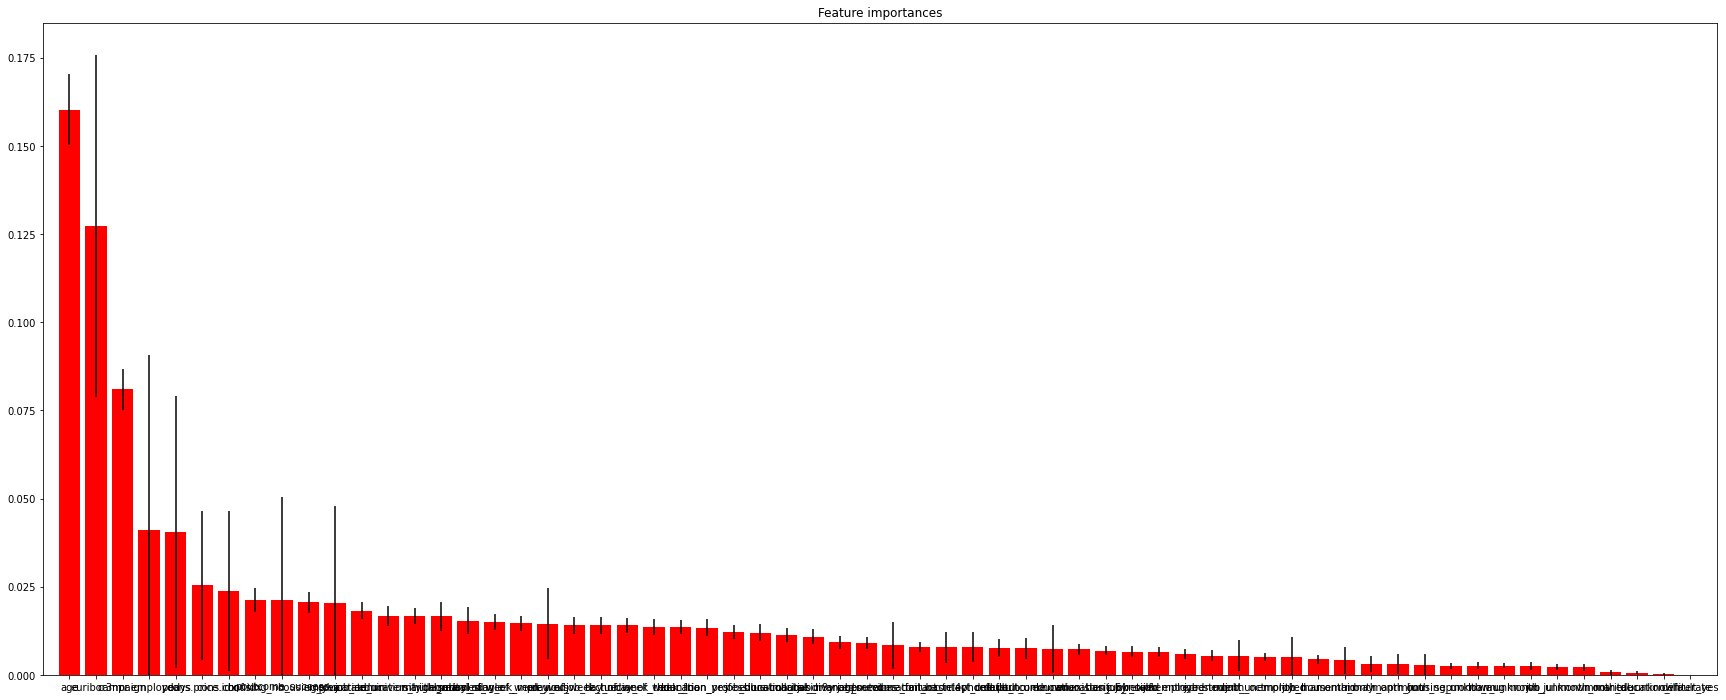

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(30,12)


In [ ]:
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


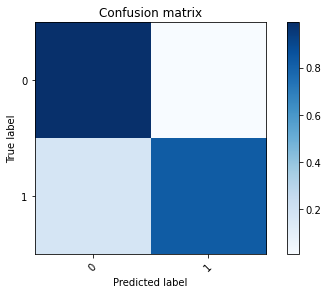

In [ ]:

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize=True,
                      title='Confusion matrix')

#plt.savefig("confusion.pdf", bbox_inches='tight')